Now we will using linear regression model   
LINEAR REGRESSSION

1.Mean absolute error  
2.Mean Square error  
3.Root Mean Square errror   
4.coff of determination 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [4]:
dataset_cols= ['bike_count','hour','temp','humidity','wind','visibility','dew_pt_temp','radiation','rain','snow','functional']
df=pd.read_csv("SeoulBikeData.csv").drop(['Date','Holiday','Seasons'], axis=1)

In [5]:
df.columns= dataset_cols
df['functional']=(df['functional']=='Yes').astype(int)  #converting yes or no into 0 and 1 of functionla column
df=df[df['hour']==12] 
df=df.drop(['hour'], axis=1)
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


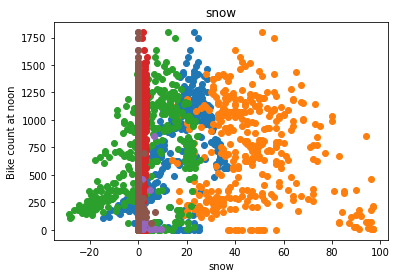

In [8]:
label_colors= {'bike_count':'red','temp':'blue','humidity':'green','dew_pt_temp':'orange','radiation':'','rain':'black','snow':'yellow'}
for label in df.columns[1:]:
    plt.scatter(df[label],df['bike_count'])pink black yellow
    plt.title(label)
    plt.ylabel('Bike count at noon')
    plt.xlabel(label)
  # plt.show() #after ploting graph we can see tempratuse has more relation with with bike count so we will be using temp through alll command

In [10]:
# df=df.drop(['wind','visibility','functional'],axis=1)
df.head() #as u can se wind and valid and functo column is deleted

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


Train/Validation/Test Dataset

In [11]:
train,val,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [12]:
def get_xy(dataframe,y_label,x_labels=None):
    dataframe=copy.deepcopy(dataframe)
    if not x_labels:
        x=dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels)==1:
            x=dataframe[x_labels[0]].values.reshape(-1,1)
        else:
            x=dataframe[x_labels].values
    y= dataframe[y_label].values.reshape(-1,1)
    data=np.hstack((x,y))
    return data,x,y

In [13]:
_,x_train_temp,y_train_temp = get_xy(train,'bike_count',x_labels=['temp'])
_,x_val_temp,y_val_temp = get_xy(val,'bike_count',x_labels=['temp'])
_,x_test_temp,y_test_temp = get_xy(test,'bike_count',x_labels=['temp'])

In [15]:
#x_train_temp

In [16]:
temp_reg=LinearRegression()
temp_reg.fit(x_train_temp,y_train_temp)

LinearRegression()

In [ ]:
print(temp_reg.coef)